<a href="https://colab.research.google.com/github/mfatihp/ML_examples/blob/master/tf__com_and_crimes_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
# Data preprocessing
raw_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data", header=None)
data = raw_data.copy()

data.tail()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19
1993,6,?,?,Ontariocity,10,0.20,0.78,0.14,0.46,0.24,...,0.11,0.30,0.05,0.08,0.04,0.73,0.5,1.00,0.13,0.48


In [61]:
data.describe()

,0,4,5,6,7,8,9,10,11,12,...,96,97,98,99,100,118,119,120,125,127
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [121]:
data = data.replace('?', np.NaN)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [91]:
data.dtypes.tail(30)

98     float64
99     float64
100    float64
101     object
102     object
103     object
104     object
105     object
106     object
107     object
108     object
109     object
110     object
111     object
112     object
113     object
114     object
115     object
116     object
117     object
118    float64
119    float64
120    float64
121     object
122     object
123     object
124     object
125    float64
126     object
127    float64
dtype: object

In [122]:
data = data.drop(columns=[0, 1, 2, 3, 4])
data.head()

,5,6,7,8,9,10,11,12,13,14,...,118,119,120,121,122,123,124,125,126,127
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [93]:
data.columns[data.isnull().any()]

Int64Index([ 30, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
            113, 114, 115, 116, 117, 121, 122, 123, 124, 126],
           dtype='int64')

In [123]:
data = data.drop(columns=[101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 121, 122, 123, 124, 126])
data.head()

,5,6,7,8,9,10,11,12,13,14,...,96,97,98,99,100,118,119,120,125,127
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


In [124]:
data = data.astype("float")
data.dtypes.tail()

118    float64
119    float64
120    float64
125    float64
127    float64
dtype: object

In [0]:
data.dropna(inplace=True)

<function matplotlib.pyplot.show>

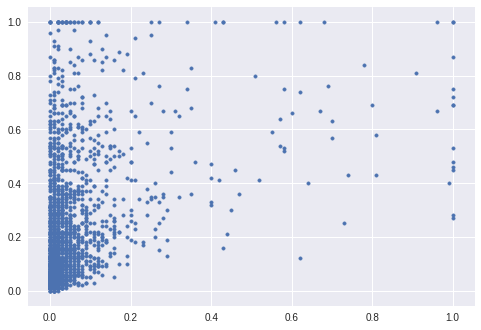

In [11]:
# Plotting
plt.scatter(data[5], data[127], marker='.')
plt.show

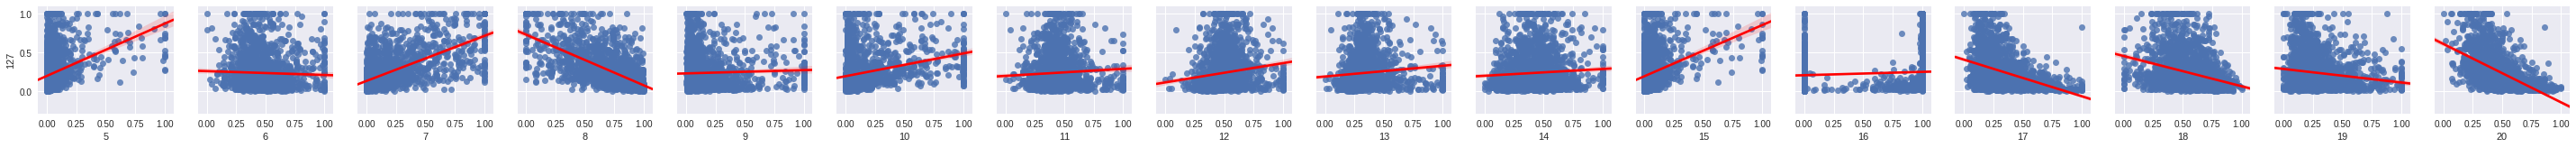

In [0]:
sns.pairplot(data, x_vars=range(5, 21), y_vars=[127], kind="reg", plot_kws={'line_kws':{'color':'red'}})

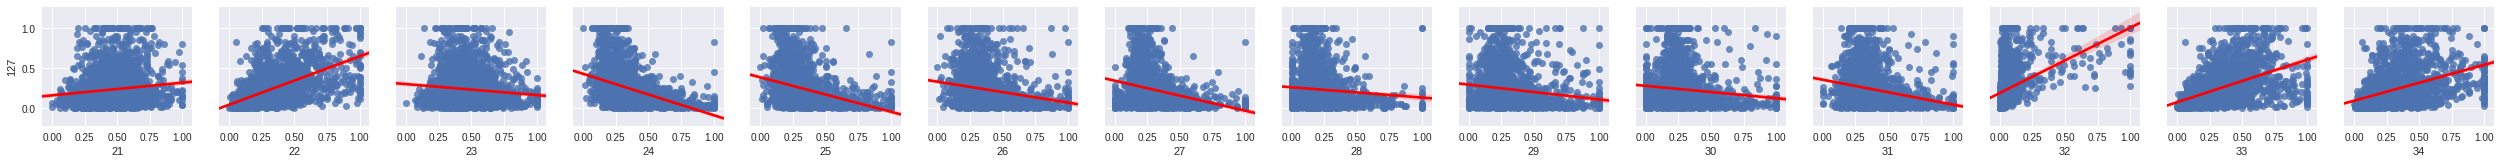

In [0]:
sns.pairplot(data, x_vars=range(21, 35), y_vars=[127], kind="reg", plot_kws={'line_kws':{'color':'red'}})

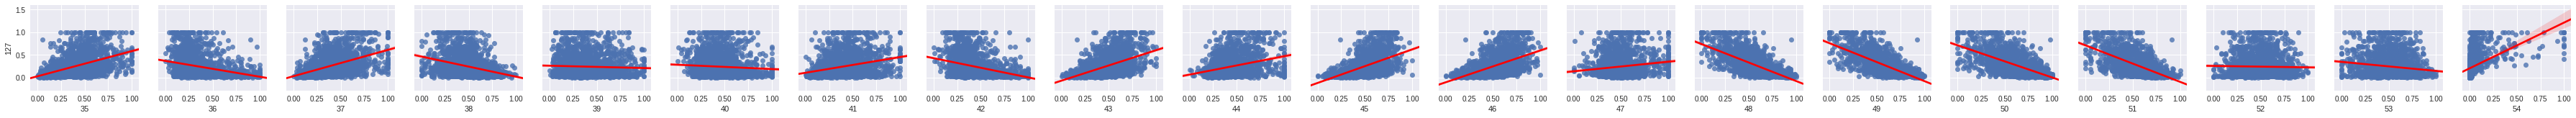

In [0]:
sns.pairplot(data, x_vars=range(35, 55), y_vars=[127], kind="reg", plot_kws={'line_kws':{'color':'red'}})

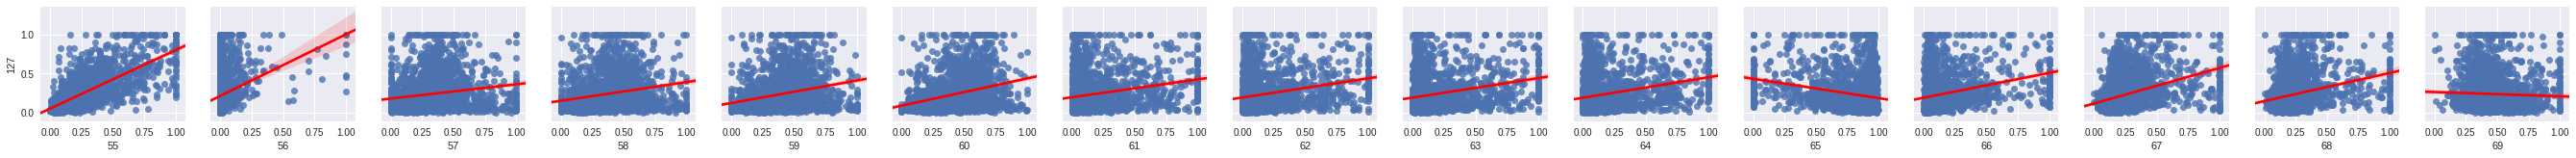

In [0]:
sns.pairplot(data, x_vars=range(55, 70), y_vars=[127], kind="reg", plot_kws={'line_kws':{'color':'red'}})

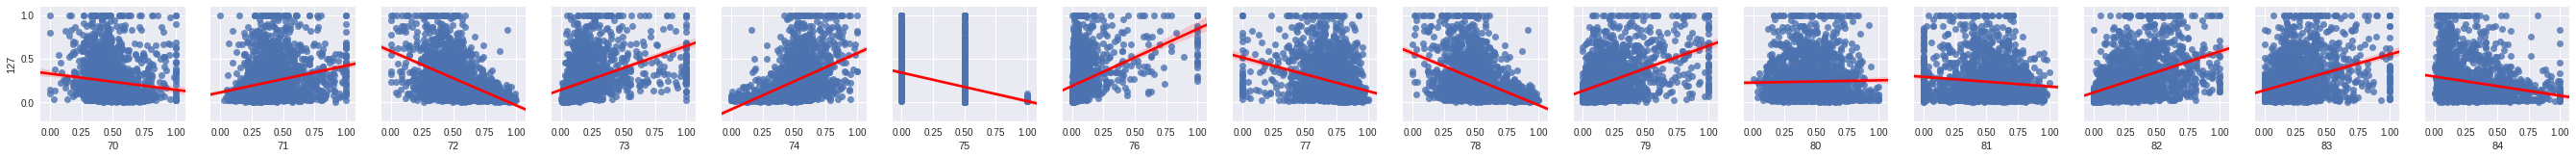

In [0]:
sns.pairplot(data, x_vars=range(70, 85), y_vars=[127], kind="reg", plot_kws={'line_kws':{'color':'red'}})

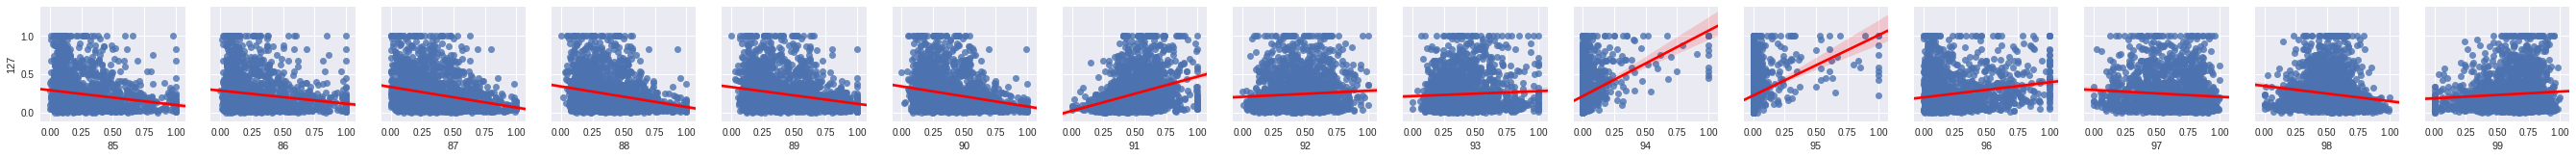

In [0]:
sns.pairplot(data, x_vars=range(85, 100), y_vars=[127], kind="reg", plot_kws={'line_kws':{'color':'red'}})

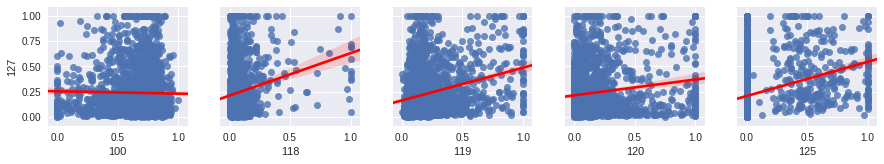

In [0]:
sns.pairplot(data, x_vars=[100, 118, 119, 120, 125], y_vars=[127], kind="reg", plot_kws={'line_kws':{'color':'red'}})

In [126]:
corr = data.corr()[127]
corr.head(10)

5     0.367160
6    -0.034934
7     0.632904
8    -0.685631
9     0.037614
10    0.293065
11    0.060479
12    0.153362
13    0.099344
14    0.067199
Name: 127, dtype: float64

In [127]:
corr_nef = corr[np.absolute(corr) < 0.1]
corr_nef.count()

18

In [128]:
corr_nef_list = corr_nef.index.values
corr_nef_list

array([  6,   9,  11,  13,  14,  16,  23,  28,  39,  40,  52,  69,  80,
        92,  93,  97,  99, 100])

In [0]:
# Dropping values which correlation coef near 0
data = data.drop(columns=corr_nef_list)

In [130]:
data.drop(columns=[75], inplace=True)
len(data.columns)

82

In [102]:
data.head()

,5,7,8,10,12,15,17,18,19,20,...,91,94,95,96,98,118,119,120,125,127
0,0.19,0.02,0.90,0.17,0.47,0.20,0.37,0.72,0.34,0.60,...,0.38,0.04,0.0,0.12,0.50,0.12,0.26,0.20,0.32,0.20
1,0.00,0.12,0.74,0.07,0.59,0.02,0.31,0.72,0.11,0.45,...,0.29,0.00,0.0,0.21,0.34,0.02,0.12,0.45,0.00,0.67
2,0.00,0.49,0.56,0.04,0.47,0.00,0.30,0.58,0.19,0.39,...,0.48,0.00,0.0,0.14,0.54,0.01,0.21,0.02,0.00,0.43
3,0.04,1.00,0.08,0.10,0.50,0.06,0.58,0.89,0.21,0.43,...,0.63,0.00,0.0,0.19,0.73,0.02,0.39,0.28,0.00,0.12
4,0.01,0.02,0.95,0.05,0.38,0.02,0.50,0.72,0.16,0.68,...,0.22,0.00,0.0,0.11,0.64,0.04,0.09,0.02,0.00,0.03


In [0]:
# Split train and test datas
train_data = data.sample(frac=0.8, random_state=0)
test_data = data.drop(train_data.index)

train_label = train_data.pop(127)
test_label = test_data.pop(127)

In [139]:
test_data.head()

,5,7,8,10,12,15,17,18,19,20,...,90,91,94,95,96,98,118,119,120,125
11,0.02,0.08,0.91,0.10,0.36,0.04,0.72,0.53,0.23,0.74,...,0.49,0.39,0.01,0.00,0.20,0.91,0.01,0.63,1.00,0.00
23,0.11,0.04,0.89,0.06,0.48,0.13,0.22,0.52,0.44,0.49,...,0.17,0.44,0.05,0.01,0.09,0.58,0.16,0.12,0.07,0.56
24,0.02,0.05,0.00,1.00,0.58,0.00,0.16,0.61,0.41,0.14,...,0.22,0.50,0.00,0.00,1.00,0.54,0.02,0.22,0.02,0.00
25,0.00,0.02,0.91,0.09,0.63,0.02,0.29,0.64,0.60,0.57,...,0.28,0.55,0.00,0.00,0.15,0.31,0.02,0.15,0.16,0.00
28,0.01,0.43,0.64,0.01,0.33,0.00,0.12,0.10,0.11,0.39,...,0.15,0.62,0.01,0.00,0.05,0.68,0.02,0.17,0.00,0.00


In [140]:
test_label.head()

11    0.08
23    0.63
24    0.31
25    0.12
28    0.49
Name: 127, dtype: float64

In [0]:
# Building model
def build_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_data.keys())]),
      tf.keras.layers.Dense(64, activation=tf.nn.relu),
      tf.keras.layers.Dense(1)
  ])
  
  model.compile(loss='mean_squared_error', optimizer= 'adam', metrics=['mean_absolute_error', 'mean_squared_error'])
  
  return model

In [0]:
model = build_model()

In [79]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                5248      
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 65        
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


In [143]:
# Adding early stop for to prevent overfitting
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

epoch = 250

# Training model
model.fit(train_data, train_label, epochs=epoch, validation_split=0.2, callbacks=[early_stop])

Train on 1275 samples, validate on 319 samples
Epoch 1/250
1275/1275 [==============================] - 0s 366us/sample - loss: 0.0616 - mean_absolute_error: 0.1817 - mean_squared_error: 0.0616 - val_loss: 0.0234 - val_mean_absolute_error: 0.1173 - val_mean_squared_error: 0.0234
Epoch 2/250
1275/1275 [==============================] - 0s 62us/sample - loss: 0.0237 - mean_absolute_error: 0.1076 - mean_squared_error: 0.0237 - val_loss: 0.0207 - val_mean_absolute_error: 0.1078 - val_mean_squared_error: 0.0207
Epoch 3/250
1275/1275 [==============================] - 0s 63us/sample - loss: 0.0213 - mean_absolute_error: 0.1018 - mean_squared_error: 0.0213 - val_loss: 0.0200 - val_mean_absolute_error: 0.1035 - val_mean_squared_error: 0.0200
Epoch 4/250
1275/1275 [==============================] - 0s 63us/sample - loss: 0.0199 - mean_absolute_error: 0.0982 - mean_squared_error: 0.0199 - val_loss: 0.0169 - val_mean_absolute_error: 0.0926 - val_mean_squared_error: 0.0169
Epoch 5/250
1275/1275 [=

In [147]:
# Testing model
model.evaluate(test_data, test_label)

399/399 [==============================] - 0s 48us/sample - loss: 0.0195 - mean_absolute_error: 0.0996 - mean_squared_error: 0.0195


[0.019547541539434502, 0.09960241, 0.019547543]